In [1]:
from abel import *
%load_ext autoreload
%autoreload 2

/users/lindstrm/.abelconfig.toml
Loading ABEL config from '/users/lindstrm/.abelconfig.toml'


In [30]:
facet2 = FACET2()
facet2.energy = 10.1e9
facet2.charge = 1.6e-9
facet2.plasma_length = 0.40
facet2.stage_class = StageHipace

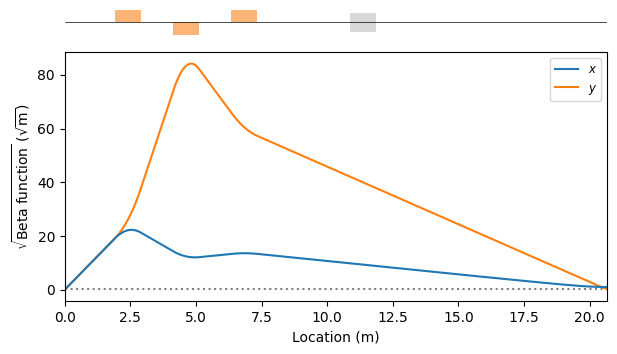

In [31]:
facet2.assemble_trackables()
facet2.spectrometer.set_imaging()
facet2.spectrometer.plot_optics()

In [32]:
facet2.run('facet2_test', overwrite=False)

Tracked #0  SourceBasic             (s =    0.0 m) :   E =   0.0 GeV, Q = -1.60 nC, σz =  30.0 µm, σE =  1.0%, ε =   5.0/5.0 mm-mrad
    ... #1  RFAcceleratorBasic      (s =  900.0 m) :   E =  10.1 GeV, Q = -1.60 nC, σz =  30.0 µm, σE =  0.0%, ε =   5.0/5.0 mm-mrad
    ... #2  BeamDeliverySystemBasic (s = 1000.0 m) :   E =  10.1 GeV, Q = -1.60 nC, σz =  30.0 µm, σE =  0.0%, ε =   5.0/5.0 mm-mrad
>> Finished HiPACE++ (job 12717093): 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2142/2142 [03:55<00:00,  9.10 steps/s]
    ... #3  StageHipace #1          (s = 1000.4 m) :   E =   7.7 GeV, Q = -1.49 nC, σz =  28.4 µm, σE = 10.8%, ε = 490.5/515.7 mm-mrad
    ... #4  SpectrometerFACET2      (s = 1021.1 m) :   E =   7.7 GeV, Q = -1.49 nC, σz = 141.8 µm, σE = 10.8%, ε =16777.4/126780.3 mm-mrad


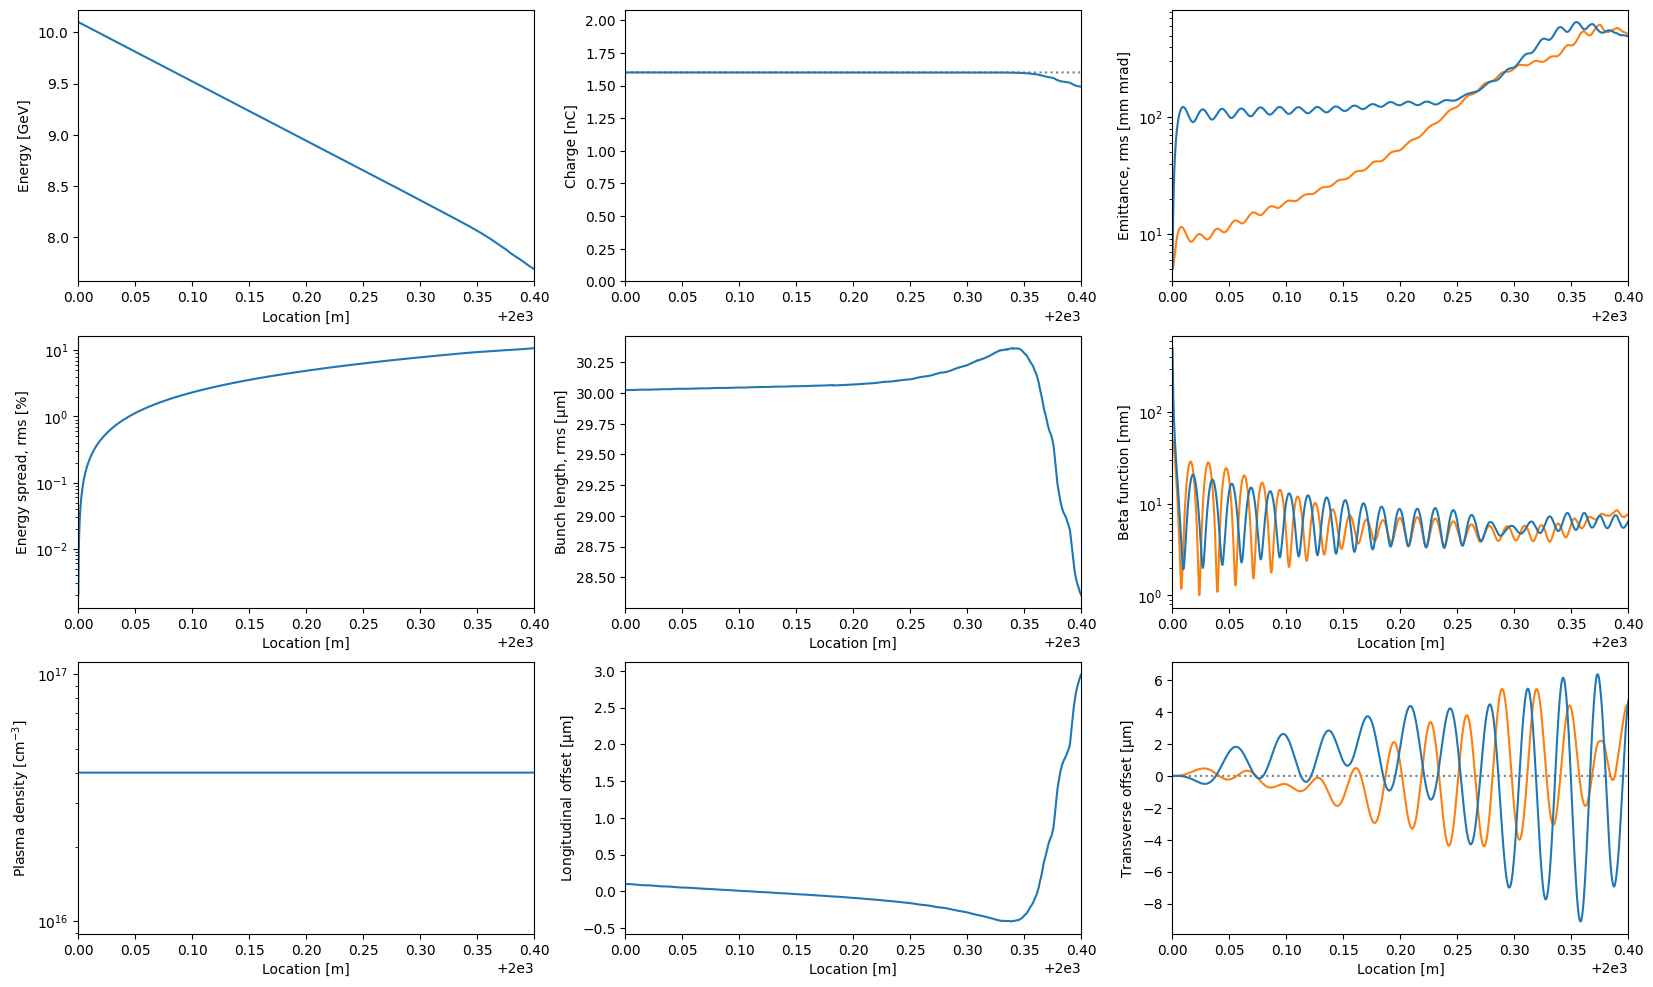

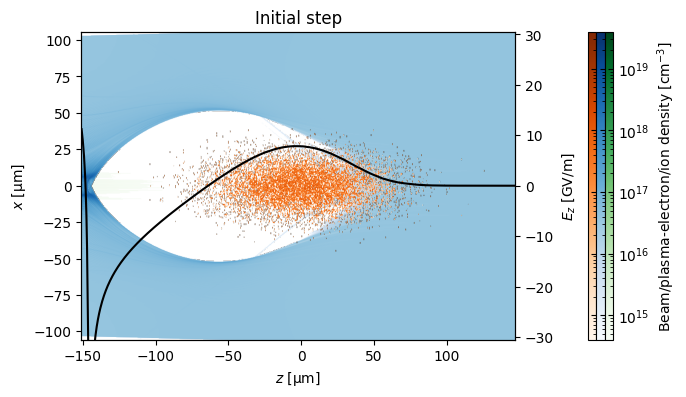

In [33]:
facet2.stage.plot_evolution()
facet2.stage.plot_wake()

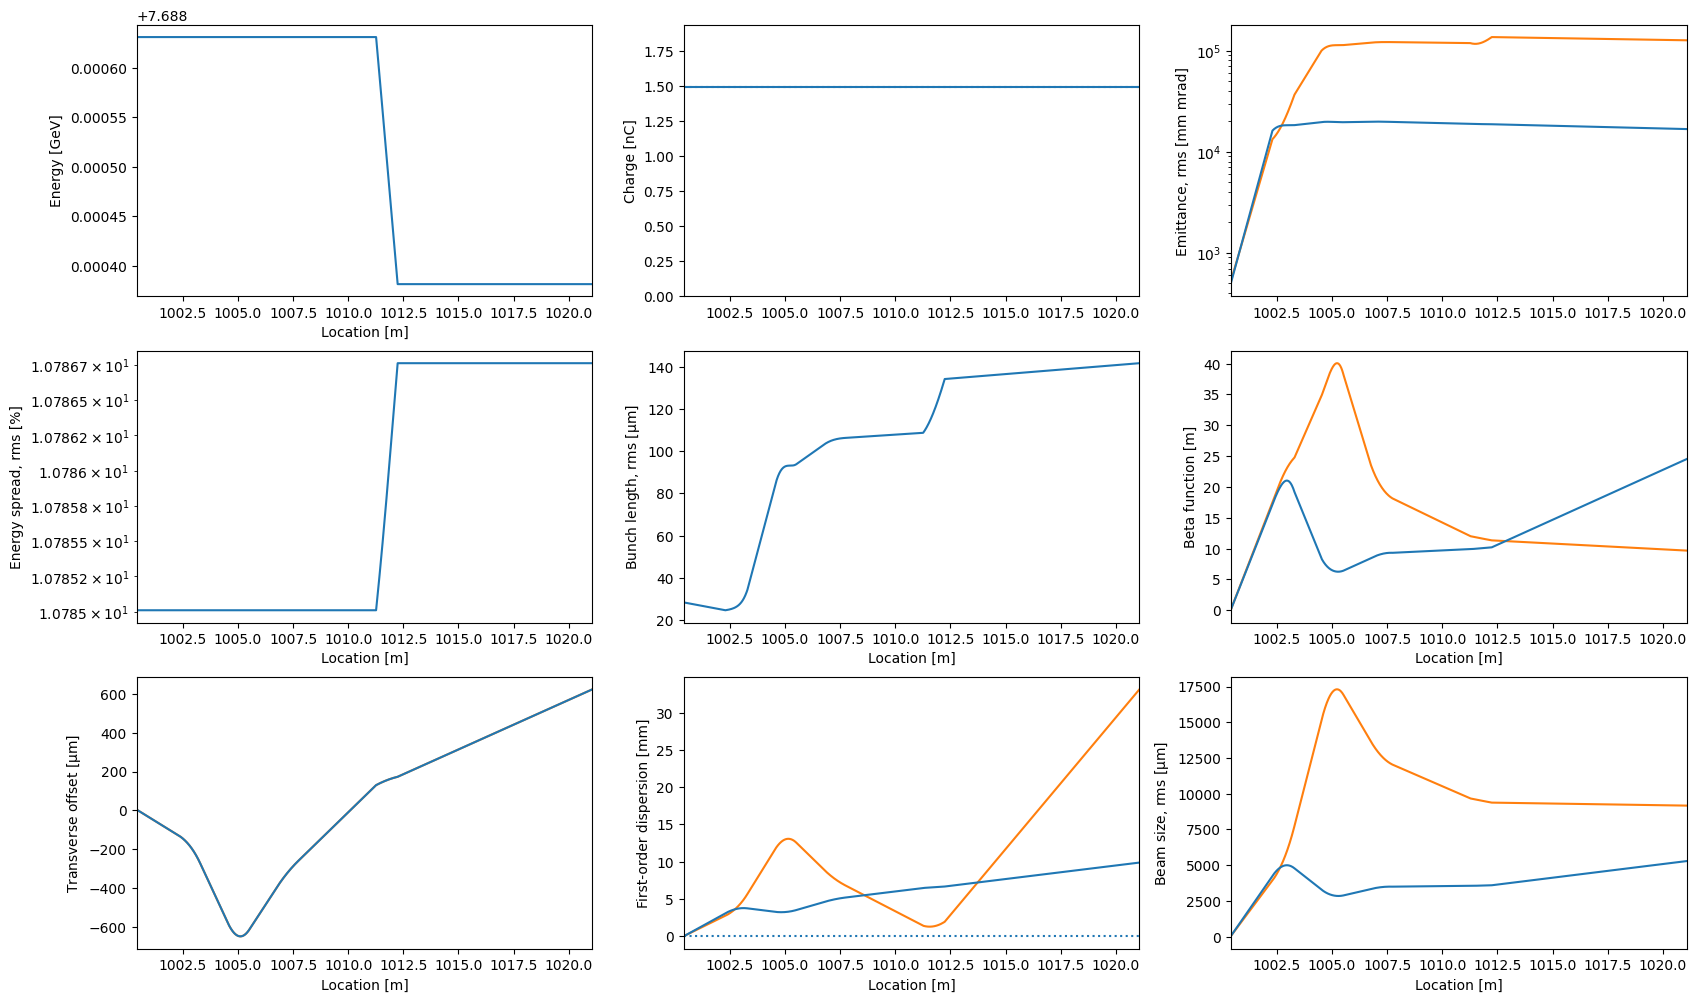

In [34]:
facet2.spectrometer.plot_evolution()

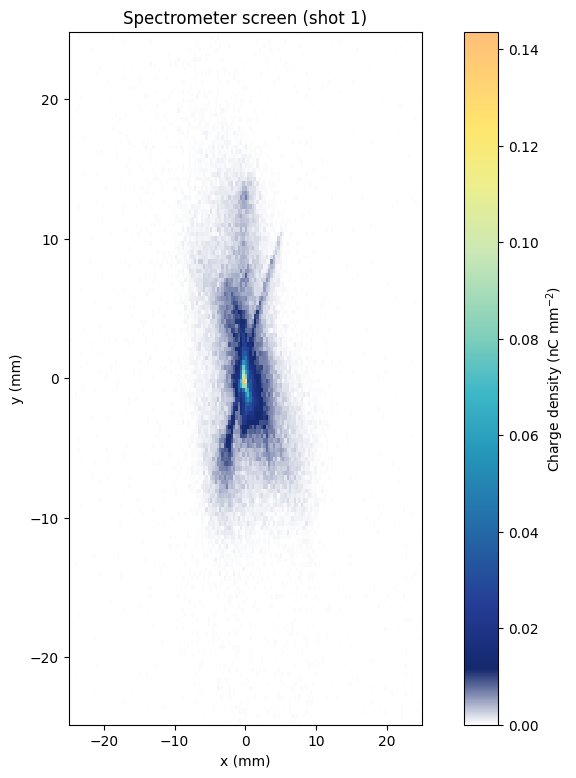

In [36]:
facet2.plot_spectrometer_screen(xlims=[-25e-3, 25e-3], ylims=[-25e-3, 25e-3])

In [ ]:
for i in range(facet2.num_outputs()):
    facet2.get_beam(i).plot_lps()

In [ ]:
return
facet2.scan('facet2_scan_example', 
           lambda obj, val: setattr(obj, 'charge', val) or obj, 
           np.logspace(np.log10(1e-12), np.log10(10e-9), 16),
           label='Charge (nC)',
           scale=1e-9,
           num_shots_per_step=1, 
           parallel=True,
           overwrite=True)